<a href="https://colab.research.google.com/github/ZiJieWong/ASEANRefugeeCrisis/blob/main/Proposal_Presentation_Group_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 11  Presentation Research Title: Study and Analysis of Global Refugee

<center><img src="https://cdn.dribbble.com/users/92386/screenshots/2153348/media/f507f34f36222c5eda36d0ac2285c307.gif" width="400"/></center>

<br/>
Group 11

| Matric No |Name |
|---- |----|
| S2176282	| Wong Zi Jie|
| S2177453	| Duo Wang |
| S2149344	| Nayli Hatim |
| 17150714	| Normaisarah Ab Majid  |
| S2113868 	|  Yinggang Jie|



<br/><br/>

---

<br/><br/>

# Proposal Presentation 

# **1.0 Introduction** (Business Understanding)


According to recent data from the UNHCR, there are **84 million** forcibly displaced people worldwide (UNHCR, 2021). The movement of refugee migration has continued to grow at an alarming rate and this is how our attention has been drawn to the plight of refugees. 


One of the related studies conducted by Katherine H. Pham has  attempt to facilitate a more comprehensive understanding of this refugees emerging field of research by providing a systematic model-agnostic framework, adapted to the use of big data sources, for structuring the prediction problem. Also highlight existing work on predicting refugee and IDP flows. (Katherine H. Pham, 2022). 

## **1.1 Problem Statement**

The rapid influx of refugees has had a significant impact on governments all over the world. The most significant impacts are seen in the political, economic, and social agendas. The scale and complexity of the various problems that have resulted from increased global refugee movement pose enormous challenges to destination countries around the world. Generally, these countries struggle to strike a balance between providing protection to millions of refugees and maintaining control over their borders.

## **1.2 Research Objectives**

This research is done with the objective to predict the total number of refugees in each ASEAN asylum country if the current global situation stays the same in the future. This research is done in hopes to send a message to countries globally on the refugee crisis happening worldwide and the number of refugees that should be expected by asylum countries, allowing asylum countries to be prepared for the changes in the number of refugees, in terms of aid provided such as hospitality and basic necessities. Many countries in ASEAN are not developed countries and the increase in the number of refugees in the future may cause an economic strain, hence we hope that the asylum countries will be able to seek more ways to help the refugees with our research.

## **1.3 Research Questions**


1. What are the demographic of refugees in ASEAN countries?
2. What are the origin of the refugees in ASEAN asylum countries? 
3. What are the expected number of refugees in the ASEAN asylum countries in the coming 5, 10, 15 years?
4. What are the possible ways to mitigate the current refugee crisis in ASEAN countries?


# **2.0 Data Understanding**


## **2.1 Data Source**

We had retreived the data from Data Worldbank: Refugee population by country or territory of asylum https://data.worldbank.org/indicator/SM.POP.REFG

This study will focus on the secondary data which is refugees data collected by UNHCR from year 2000 until 2021. 

### Dataset List
  - Total Population of Refugee By Year
  - Population of Refugee By Country
  - Refugee Demographic


  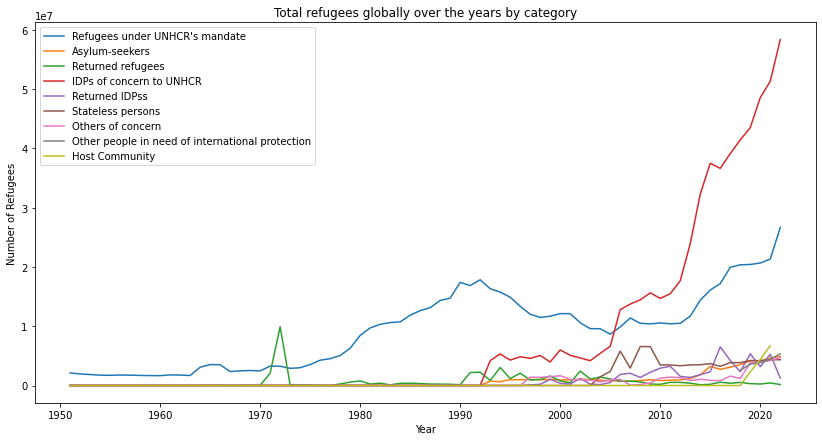

# **3.0 Data Preparation**







## 3.2 Data Cleaning

Data Cleaning is an important step that every Data Scientist has to go through with their dataset in order to obtain a set of high-quality data. This high-quality data can then only be used to achieve high-quality results. Hence, this section will show the process of cleaning the data for the following datasets: 

1. Worldwide Refugees Population - `wrld_ref_pop`
2. Refugees Population in Asylum countries - `asyl_ref_pop`
3. Worldwide Refugees Population Demographic - `wrld_ref_demo`
4. Refugees demographic in Asylum countries - `asyl_ref_demo`


Import Library


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pdb
import folium
import statsmodels.api as sm
from IPython import get_ipython
from numpy import inf
from scipy.stats import linregress
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from folium.plugins import HeatMap
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

### 3.2.1 Worldwide Refugees Population

In [ ]:
#Import the dataset and retrieve sample from dataset
wrld_ref_pop = pd.read_csv("https://raw.githubusercontent.com/ZiJieWong/ASEANRefugeeCrisis/main/Worldwide%20Refugees%20Population.csv")
wrld_ref_pop.sample(7)

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,Returned refugees,IDPs of concern to UNHCR,Returned IDPss,Stateless persons,Others of concern,Other people in need of international protection,Host Community
16,1967,-,-,-,-,2356991,0,7620,0,0,0,0,NaN,0.0
0,1951,-,-,-,-,2116011,0,0,0,0,0,0,NaN,0.0
33,1984,-,-,-,-,10728307,0,367753,0,0,0,0,NaN,0.0
11,1962,-,-,-,-,1765622,0,0,0,0,0,0,NaN,0.0
60,2011,-,-,-,-,10403937,895691,531868,15473378,3245804,3477100,1411844,NaN,0.0
69,2020,-,-,-,-,20661846,4184926,250951,48557439,3184118,4179349,3940730,3862102.0,4369021.0
48,1999,-,-,-,-,11686760,1027400,1599105,3968648,1048387,0,1491142,NaN,0.0


This dataset records the historical total amount of refugees worldwide and categorises the refugees into different statuses. From the sample retrieved, we found that there are columns that contain missing data in the dataset. There are also many columns filled with values '-' or '0' which will cause our analysis results to be affected.  

In [ ]:
wrld_ref_pop.describe(include=['object'])

,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO)
count,72,72,72,72
unique,1,1,1,1
top,-,-,-,-
freq,72,72,72,72


In [ ]:
print(wrld_ref_pop['Country of origin'].unique())
print(wrld_ref_pop['Country of origin (ISO)'].unique())
print(wrld_ref_pop['Country of asylum'].unique())
print(wrld_ref_pop['Country of asylum (ISO)'].unique())

['-']
['-']
['-']
['-']


Since the four columns shown in the table above does not contain any values other than '-', we shall proceed to remove these columns. 

In [ ]:
wrld_ref_pop = wrld_ref_pop.drop(['Country of origin', 'Country of origin (ISO)', 'Country of asylum', 'Country of asylum (ISO)'], axis=1)

In [ ]:
#Summarise the dataset for better view
wrld_ref_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 10 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              72 non-null     int64  
 1   Refugees under UNHCR's mandate                    72 non-null     int64  
 2   Asylum-seekers                                    72 non-null     int64  
 3   Returned refugees                                 72 non-null     int64  
 4   IDPs of concern to UNHCR                          72 non-null     int64  
 5   Returned IDPss                                    72 non-null     int64  
 6   Stateless persons                                 72 non-null     int64  
 7   Others of concern                                 72 non-null     int64  
 8   Other people in need of international protection  5 non-null      float64
 9   Host Community         

In [ ]:
#Calculate the missing data percentage of each column
Missing_Data = wrld_ref_pop.isnull().sum() * 100 / len(wrld_ref_pop)
missing_value_wrld_ref_pop = pd.DataFrame({'Missing Data %': round(Missing_Data,2)})
missing_value_wrld_ref_pop.sort_values('Missing Data %', ascending=False)

,Missing Data %
Other people in need of international protection,93.06
Host Community,1.39
Year,0.00
Refugees under UNHCR's mandate,0.00
Asylum-seekers,0.00
Returned refugees,0.00
IDPs of concern to UNHCR,0.00
Returned IDPss,0.00
Stateless persons,0.00
Others of concern,0.00


From the summary and missing data percentage, we note that there are two columns from the dataset that contains missing values. 'Other peole in need of international protection' has a 93.06% missing percentage while 'Host Community' has only 1.39%. We shall proceed to investigate the cause of missing values for 'Other peole in need of international protection'.

In [ ]:
#Retrieve rows of data that contains 'Other people in need of international protection'

rows_othppl =  pd.notnull(wrld_ref_pop["Other people in need of international protection"])
wrld_ref_pop[rows_othppl]

,Year,Refugees under UNHCR's mandate,Asylum-seekers,Returned refugees,IDPs of concern to UNHCR,Returned IDPss,Stateless persons,Others of concern,Other people in need of international protection,Host Community
67,2018,20359553,3501629,519321,41425168,2312926,3851981,1182756,2592947.0,0.0
68,2019,20414669,4148141,317181,43503362,5343793,4217776,3836116,3582202.0,2304506.0
69,2020,20661846,4184926,250951,48557439,3184118,4179349,3940730,3862102.0,4369021.0
70,2021,21327285,4616134,429234,51322623,5265622,4337409,4223878,4406432.0,6731133.0
71,2022,26664700,4910889,162266,58352037,1261812,4345302,4704226,5342069.0,NaN


From the above, we can see that the column of 'Other people in need of international protection' are filled starting from 2018 to 2022. This indicates that this category does not exist before 2018 and any analysis to be done on 'Other people in need of international protection' should be limited to starting from 2018 onwards.

Since column 'Host Community' has only a 1.39% missing data percentage, we shall ignore the missing values.

We use a line graph to visualise the total amount of refugee population globally.

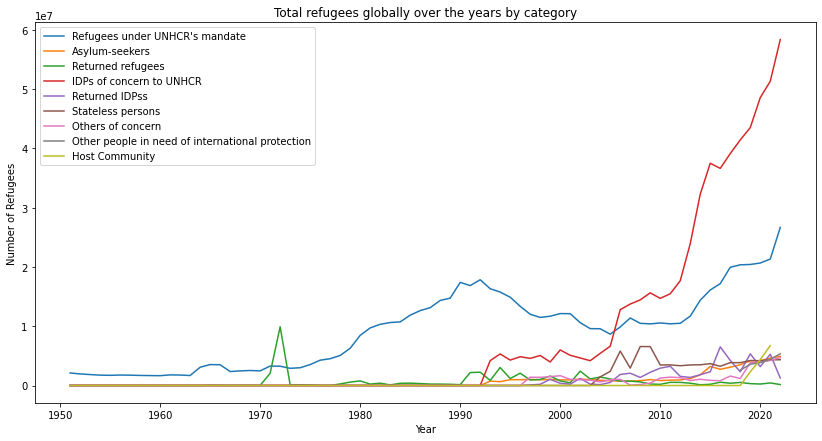

In [ ]:
fig, wrld_pop = plt.subplots(figsize = (14, 7))

wrld_pop.plot(wrld_ref_pop['Year'], wrld_ref_pop["Refugees under UNHCR's mandate"], label = "Refugees under UNHCR's mandate")
wrld_pop.plot(wrld_ref_pop['Year'], wrld_ref_pop['Asylum-seekers'], label = 'Asylum-seekers')
wrld_pop.plot(wrld_ref_pop['Year'], wrld_ref_pop['Returned refugees'], label = 'Returned refugees')
wrld_pop.plot(wrld_ref_pop['Year'], wrld_ref_pop['IDPs of concern to UNHCR'], label = 'IDPs of concern to UNHCR')
wrld_pop.plot(wrld_ref_pop['Year'], wrld_ref_pop['Returned IDPss'], label = 'Returned IDPss')
wrld_pop.plot(wrld_ref_pop['Year'], wrld_ref_pop['Stateless persons'], label = 'Stateless persons')
wrld_pop.plot(wrld_ref_pop['Year'], wrld_ref_pop['Others of concern'], label = 'Others of concern')
wrld_pop.plot(wrld_ref_pop['Year'], wrld_ref_pop['Other people in need of international protection'], label = 'Other people in need of international protection')
wrld_pop.plot(wrld_ref_pop['Year'], wrld_ref_pop['Host Community'], label = 'Host Community')

wrld_pop.legend(loc = 'upper left')

plt.xlabel("Year")
plt.ylabel("Number of Refugees")
plt.title("Total refugees globally over the years by category")
plt.show()

### 3.2.2 Refugees Population in Asylum countries

In [ ]:
#Import the dataset and retrieve sample from dataset
asyl_ref_pop = pd.read_csv("https://raw.githubusercontent.com/ZiJieWong/ASEANRefugeeCrisis/main/Refugees%20population%20in%20Asylum%20countries.csv")
asyl_ref_pop.sample(7)

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR,Other people in need of international protection
96173,2021,Sudan,SDN,Zambia,ZMB,29,0,0,NaN
72610,2017,Bangladesh,BGD,Rep. of Korea,KOR,98,413,0,NaN
47479,2012,United Rep. of Tanzania,TZA,Central African Rep.,CAF,5,0,0,NaN
32271,2008,Myanmar,MMR,Indonesia,IDN,17,14,0,NaN
32065,2008,Dominican Rep.,DOM,Greece,GRC,0,5,0,NaN
5319,2000,Spain,ESP,United States of America,USA,0,10,0,NaN
86174,2020,Syrian Arab Rep.,SYR,Bosnia and Herzegovina,BIH,22,10,0,NaN


In [ ]:
asyl_ref_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101893 entries, 0 to 101892
Data columns (total 9 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Year                                              101893 non-null  int64  
 1   Country of origin                                 101893 non-null  object 
 2   Country of origin (ISO)                           100790 non-null  object 
 3   Country of asylum                                 101893 non-null  object 
 4   Country of asylum (ISO)                           101892 non-null  object 
 5   Refugees under UNHCR's mandate                    101893 non-null  int64  
 6   Asylum-seekers                                    101893 non-null  int64  
 7   IDPs of concern to UNHCR                          101893 non-null  int64  
 8   Other people in need of international protection  100 non-null     float64
dtypes: fl

In [ ]:
#Calculate the missing data percentage of each column
Missing_Data = asyl_ref_pop.isnull().sum() * 100 / len(asyl_ref_pop)
missing_value_asyl_ref_pop = pd.DataFrame({'Missing Data %': round(Missing_Data,2)})
missing_value_asyl_ref_pop.sort_values('Missing Data %', ascending=False)

,Missing Data %
Other people in need of international protection,99.90
Country of origin (ISO),1.08
Year,0.00
Country of origin,0.00
Country of asylum,0.00
Country of asylum (ISO),0.00
Refugees under UNHCR's mandate,0.00
Asylum-seekers,0.00
IDPs of concern to UNHCR,0.00


From the table above, column 'Other people in need of international protection' contains a high percentage of missing data. It has only 100 rows of data that are available, since there are more than 100 thousand entries, we shall drop the column as it is insignificant. 

In [ ]:
asyl_ref_pop = asyl_ref_pop.drop(['Other people in need of international protection'], axis=1)
asyl_ref_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101893 entries, 0 to 101892
Data columns (total 8 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Year                            101893 non-null  int64 
 1   Country of origin               101893 non-null  object
 2   Country of origin (ISO)         100790 non-null  object
 3   Country of asylum               101893 non-null  object
 4   Country of asylum (ISO)         101892 non-null  object
 5   Refugees under UNHCR's mandate  101893 non-null  int64 
 6   Asylum-seekers                  101893 non-null  int64 
 7   IDPs of concern to UNHCR        101893 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 6.2+ MB


Since our data would be later use for ASEAN asylum countries only, we shall proceed to extract all rows consisting of ASEAN countries as Country of Asylum only. 

In [ ]:
asyl_list = asyl_ref_pop['Country of asylum'].unique()
asyl_list.sort()
print(asyl_list)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Rep.' 'Chad' 'Chile' 'China' 'China, Hong Kong SAR'
 'China, Macao SAR' 'Colombia' 'Comoros' 'Congo' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao ' 'Cyprus' 'Czechia'
 'Dem. Rep. of the Congo' 'Denmark' 'Djibouti' 'Dominican Rep.' 'Ecuador'
 'Egypt' 'El Salvador' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran (Islamic Rep. of)' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Jap

Now that we have the list of Asylum countries, extract all ASEAN countries from the list.

In [ ]:
asean_list = ['Brunei','Cambodia','Indonesia','Laos','Malaysia','Myanmar',
              'Philippines','Singapore','Thailand','Viet Nam']

asyl_asean = list(set(asyl_list).intersection(asean_list))
asyl_asean.sort()
print(asyl_asean)


['Cambodia', 'Indonesia', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']


In [ ]:
asean_ref_pop = asyl_ref_pop[asyl_ref_pop['Country of asylum'].isin(asyl_asean)]

#Check if filtered successful
asean_ref_pop['Country of asylum'].unique()


array(['Cambodia', 'Indonesia', 'Malaysia', 'Philippines', 'Viet Nam',
       'Thailand', 'Myanmar', 'Singapore'], dtype=object)

Hence, we have extracted all the ASEAN countries with refugees.

### 3.2.3 Worldwide Refugees Population Demographic

In [ ]:
#Import the dataset and retrieve sample from dataset
wrld_ref_demo = pd.read_csv("https://github.com/ZiJieWong/ASEANRefugeeCrisis/raw/main/Worldwide%20Refugees%20Population%20Demographic.csv")
wrld_ref_demo.sample(7)

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Female 0 - 4,Female 5 - 11,Female 12 - 17,Female 18 - 59,Female 60,Female other,Female total,Male 0 - 4,Male 5 - 11,Male 12 - 17,Male 18 - 59,Male 60,Male other,Male total,Total
99,2001,Mali,MLI,-,-,0,0,0,9,0,18,27,0,5,0,6,0,90,101,311
46,2001,Estonia,EST,-,-,0,0,0,0,0,15,15,0,0,0,0,0,5,5,483
558,2004,Brazil,BRA,-,-,0,0,0,0,0,6,6,0,0,0,0,0,0,0,401
3204,2018,Georgia,GEO,-,-,20,46,40,347,58,1688,2199,24,77,44,323,35,1559,2062,6983
3123,2017,Timor-Leste,TLS,-,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13
1845,2011,Brazil,BRA,-,-,5,15,16,63,15,13,127,0,10,15,34,0,0,59,1040
2149,2012,Russian Federation,RUS,-,-,274,965,1261,11816,8661,7589,30566,258,1023,1318,10450,6007,7545,26601,110587


In [ ]:
wrld_ref_demo.describe(include=['object'])

,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO)
count,3904,3883,3904,3904
unique,201,200,1,1
top,Afghanistan,AFG,-,-
freq,21,21,3904,3904


In [ ]:
print(wrld_ref_demo['Country of asylum'].unique())
print(wrld_ref_demo['Country of asylum (ISO)'].unique())

['-']
['-']


In [ ]:
wrld_ref_demo = wrld_ref_demo.drop(['Country of asylum', 'Country of asylum (ISO)'], axis=1)

In [ ]:
wrld_ref_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     3904 non-null   int64 
 1   Country of origin        3904 non-null   object
 2   Country of origin (ISO)  3883 non-null   object
 3   Female 0 - 4             3904 non-null   int64 
 4   Female 5 - 11            3904 non-null   int64 
 5   Female 12 - 17           3904 non-null   int64 
 6   Female 18 - 59           3904 non-null   int64 
 7   Female 60                3904 non-null   int64 
 8   Female other             3904 non-null   int64 
 9   Female total             3904 non-null   int64 
 10  Male 0 - 4               3904 non-null   int64 
 11  Male 5 - 11              3904 non-null   int64 
 12  Male 12 - 17             3904 non-null   int64 
 13  Male 18 - 59             3904 non-null   int64 
 14  Male 60                  3904 non-null  

In [ ]:
year_list = wrld_ref_demo['Year'].unique()
print(year_list)

[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021]


From the above, we know that the Demographic for world refugees are recorded from 2001 to 2021. Hence, analysis on refugee's demographic should be conducted for the years 2001 to 2021 only. 

### 3.2.4 Refugees demographic in Asylum countries

In [ ]:
#Import the dataset and retrieve sample from dataset
asyl_ref_demo = pd.read_csv("https://github.com/ZiJieWong/ASEANRefugeeCrisis/blob/main/Refugees%20demographic%20in%20Asylum%20countries.csv?raw=true")
asyl_ref_demo.sample(7)

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Female 0 - 4,Female 5 - 11,Female 12 - 17,Female 18 - 59,Female 60,Female other,Female total,Male 0 - 4,Male 5 - 11,Male 12 - 17,Male 18 - 59,Male 60,Male other,Male total,Total
31434,2009,Uganda,UGA,Mozambique,MOZ,0,5,0,0,0,0,5,0,0,0,0,0,0,0,5
89103,2021,Lebanon,LBN,Nigeria,NGA,0,5,0,5,0,0,10,0,5,0,31,0,0,36,46
20749,2006,Afghanistan,AFG,Turkmenistan,TKM,36,74,61,159,16,0,346,35,63,59,188,19,0,364,710
88839,2021,Angola,AGO,Mozambique,MOZ,0,0,0,0,0,0,0,0,0,0,5,0,0,5,5
55544,2015,Lao People's Dem. Rep.,LAO,Canada,CAN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
12961,2004,Ghana,GHA,Senegal,SEN,0,0,0,9,0,0,9,0,0,5,16,0,0,21,30
35749,2010,Cote d'Ivoire,CIV,Norway,NOR,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52


In [ ]:
asyl_ref_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90810 entries, 0 to 90809
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Year                     90810 non-null  int64 
 1   Country of origin        90810 non-null  object
 2   Country of origin (ISO)  89869 non-null  object
 3   Country of asylum        90810 non-null  object
 4   Country of asylum (ISO)  90810 non-null  object
 5   Female 0 - 4             90810 non-null  int64 
 6   Female 5 - 11            90810 non-null  int64 
 7   Female 12 - 17           90810 non-null  int64 
 8   Female 18 - 59           90810 non-null  int64 
 9   Female 60                90810 non-null  int64 
 10  Female other             90810 non-null  int64 
 11  Female total             90810 non-null  int64 
 12  Male 0 - 4               90810 non-null  int64 
 13  Male 5 - 11              90810 non-null  int64 
 14  Male 12 - 17             90810 non-nul

In [ ]:
asyl_ref_demo.isnull().sum()

Year                         0
Country of origin            0
Country of origin (ISO)    941
Country of asylum            0
Country of asylum (ISO)      0
Female 0 - 4                 0
Female 5 - 11                0
Female 12 - 17               0
Female 18 - 59               0
Female 60                    0
Female other                 0
Female total                 0
Male 0 - 4                   0
Male 5 - 11                  0
Male 12 - 17                 0
Male 18 - 59                 0
Male 60                      0
Male other                   0
Male total                   0
Total                        0
dtype: int64

Since our data would be later use for ASEAN asylum countries only, we shall proceed to extract all rows consisting of ASEAN countries as Country of Asylum only.

In [ ]:
asyl_demo = asyl_ref_demo['Country of asylum'].unique()
asyl_demo.sort()
print(asyl_demo)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bolivia (Plurinational State of)'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Rep.' 'Chad' 'Chile' 'China' 'China, Hong Kong SAR'
 'China, Macao SAR' 'Colombia' 'Comoros' 'Congo' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao ' 'Cyprus' 'Czechia'
 'Dem. Rep. of the Congo' 'Denmark' 'Djibouti' 'Dominican Rep.' 'Ecuador'
 'Egypt' 'El Salvador' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran (Islamic Rep. of)' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Jap

In [ ]:
asean_demo = list(set(asyl_demo).intersection(asean_list))
asean_demo.sort()
print(asean_demo)

['Cambodia', 'Indonesia', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']


In [ ]:
asyl_ref_demo = asyl_ref_demo[asyl_ref_demo['Country of asylum'].isin(asean_demo)]

#Check if filtered successful
asyl_ref_demo['Country of asylum'].unique()

array(['Cambodia', 'Indonesia', 'Malaysia', 'Philippines', 'Viet Nam',
       'Thailand', 'Myanmar', 'Singapore'], dtype=object)

#**4.0 Exploratory Data Analysis (EDA)**

##4.1 Share of forcibly displaced individuals in 2021 (%) in Asean, by category

In [ ]:
asean_ref_pop.sample(3)

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR
69318,2016,Ethiopia,ETH,Thailand,THA,6,32,0
83401,2019,Morocco,MAR,Malaysia,MYS,5,0,0
28898,2007,Syrian Arab Rep.,SYR,Malaysia,MYS,5,0,0


The table above respectively shows the refugees from Ethiopia, Morocco, and Syria Arab Rep. in 2007, 2019, and 2016,  and the countries that provided asylum to these refugees. The number of refugees under the UNHCR' s mandate is similar between countries. But the number of refugees from Morocco seeking asylum in Thailand is the highest, at 32.

In [ ]:
#isolate date from 2021
asean_ref_pop_2021 = asean_ref_pop.loc[asean_ref_pop['Year'] == 2021]
#calculate percentage breakdown of each category
total_2021 = asean_ref_pop_2021["Refugees under UNHCR's mandate"].sum()+asean_ref_pop_2021["Asylum-seekers"].sum()+asean_ref_pop_2021["IDPs of concern to UNHCR"].sum()
UNHCR_mandate_2021 =round(asean_ref_pop_2021["Refugees under UNHCR's mandate"].sum()/total_2021*100,2)
Asylum_2021 =round(asean_ref_pop_2021["Asylum-seekers"].sum()/total_2021*100,2)
IDP_2021 =round(asean_ref_pop_2021["IDPs of concern to UNHCR"].sum()/total_2021*100,2)



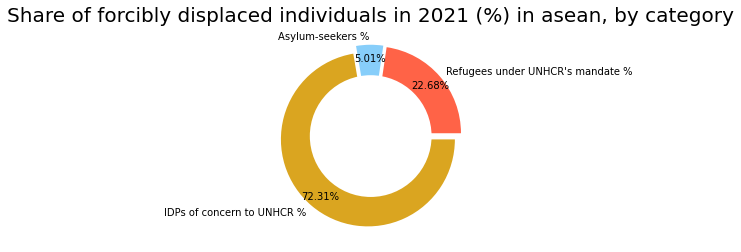

In [ ]:
labels = ["Refugees under UNHCR's mandate %", "Asylum-seekers %", "IDPs of concern to UNHCR %"]
percentage = [UNHCR_mandate_2021, Asylum_2021, IDP_2021]
#percentage = [25.38, 5.09, 59.65, 5.13, 4.74]
colors = ['tomato', 'lightskyblue', 'goldenrod', 'green']
explode = (0.05, 0.05, 0.05)

plt.pie(percentage, colors=colors, labels=labels,
        autopct='%1.2f%%', pctdistance=0.85,
        explode=explode)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Share of forcibly displaced individuals in 2021 (%) in asean, by category", fontsize='20')
# plt.legend(labels, loc="upper right")
plt.show()

 The pie chart above shows that IDPs are the largest group of refugees recorded in the dataset. Cross-border migration is never an easy journey, and most refugees cannot afford to travel across borders. There are also many illegal groups that charge exorbitant fees to transport refugees into another country illegally. Asylum seekers are among the smallest groups, as they are usually subject to stringent conditions and vetting during the application process. 

##4.2 Trend of forcibly displaced individuals | 2001-2021 in Asean

In [ ]:
asean_ref_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2474 entries, 390 to 101408
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Year                            2474 non-null   int64 
 1   Country of origin               2474 non-null   object
 2   Country of origin (ISO)         2463 non-null   object
 3   Country of asylum               2474 non-null   object
 4   Country of asylum (ISO)         2474 non-null   object
 5   Refugees under UNHCR's mandate  2474 non-null   int64 
 6   Asylum-seekers                  2474 non-null   int64 
 7   IDPs of concern to UNHCR        2474 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 174.0+ KB


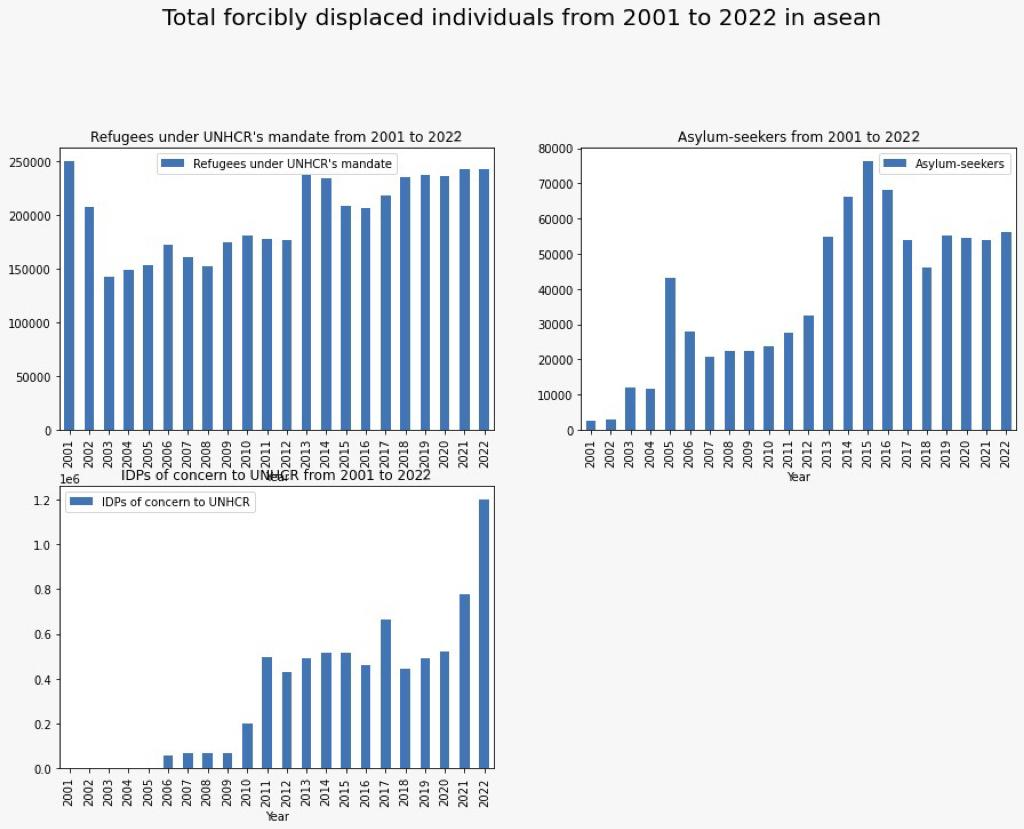

Between year 2003 to 2012, and year 2018 to 2022, the number of refugees under UNHCR's mandate remained relatively stable. A possible explanation to why the number in 2018 to 2022 remain stable is bacuse the new category of Venezuelans displaced abroad is introduced in year 2018. The number has been seperated from the refugee under UNHCR's mandate. There is, however, a significant increase from year 2012 to 2017. This is a period of increasing conflict or war, particularly in Afghanistan, Syria, and Somalia.

For asylum seekers, the number is relatively stable between year 2006 to 2012. Starting from 2012, the number of asylum seekers is showing a similar uptrends.

For IDPs, there is a slight jump between year 2005 to 2006. This category also showing an uptrends from year 2012.


Overall, the total number of refugees is exhibiting similar behaviors to that of IDP number. We will take a further look into how these number compared to each other side by side.

## 4.3 Top 3 asean origin countries and countries hosted largest number of refugees in 2021, by category

In [ ]:
asean_ref_pop.head(5)

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR
390,1999,Afghanistan,AFG,Cambodia,KHM,5,0,0
391,1999,China,CHN,Cambodia,KHM,5,0,0
392,1999,Sri Lanka,LKA,Cambodia,KHM,5,0,0
393,1999,Viet Nam,VNM,Cambodia,KHM,5,0,0
1105,1999,Afghanistan,AFG,Indonesia,IDN,12,0,0


The table above shows refugees from Afghanistan, China, Sri Lanka, and Vietnam seeking asylum in Cambodia in 1999, as well as Afghan refugees seeking asylum in Indonesia. Among the refugees from Afghanistan seeking asylum in Indonesia, the UNHCR has the largest number of refugees

In [ ]:
asean_ref_pop['Country of asylum'].unique()

array(['Cambodia', 'Indonesia', 'Malaysia', 'Philippines', 'Viet Nam',
       'Thailand', 'Myanmar', 'Singapore'], dtype=object)

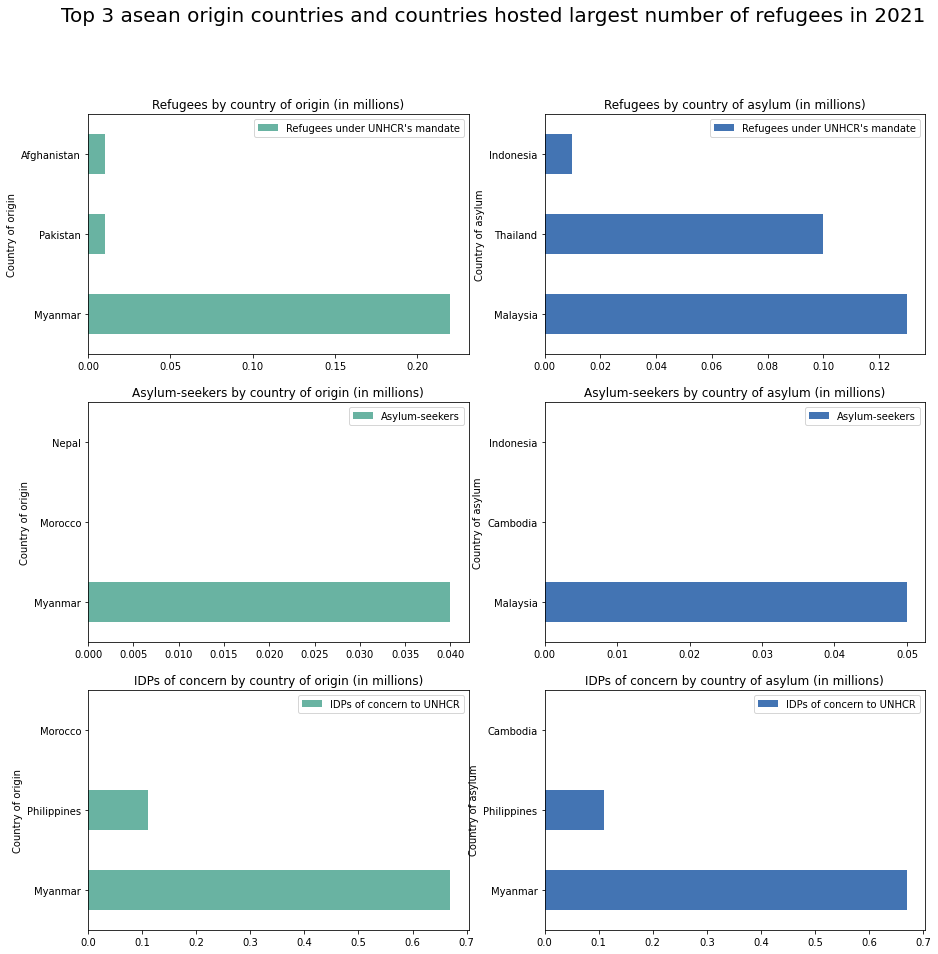

In [ ]:
asean_ref_pop_2 = asean_ref_pop.loc[asean_ref_pop["Year"] == 2021]

fig, subs = plt.subplots(3, 2, figsize=(15,15))

total_refugees_by_origin = round(asean_ref_pop_2.groupby("Country of origin")["Refugees under UNHCR's mandate"].sum()/1000000,2).reset_index().sort_values("Refugees under UNHCR's mandate", ascending=False)
total_asylum_by_origin = round(asean_ref_pop_2.groupby("Country of origin")["Asylum-seekers"].sum()/1000000,2).reset_index().sort_values("Asylum-seekers", ascending=False)
total_idp_by_origin = round(asean_ref_pop_2.groupby("Country of origin")["IDPs of concern to UNHCR"].sum()/1000000,2).reset_index().sort_values("IDPs of concern to UNHCR", ascending=False)
total_refugees_by_asylum = round(asean_ref_pop_2.groupby("Country of asylum")["Refugees under UNHCR's mandate"].sum()/1000000,2).reset_index().sort_values("Refugees under UNHCR's mandate", ascending=False)
total_asylum_by_asylum = round(asean_ref_pop_2.groupby("Country of asylum")["Asylum-seekers"].sum()/1000000,2).reset_index().sort_values("Asylum-seekers", ascending=False)
total_idp_by_asylum = round(asean_ref_pop_2.groupby("Country of asylum")["IDPs of concern to UNHCR"].sum()/1000000,2).reset_index().sort_values("IDPs of concern to UNHCR", ascending=False)


total_refugees_by_origin[:3].plot(kind="barh", color="#69b3a2", x="Country of origin", y="Refugees under UNHCR's mandate", title="Refugees by country of origin (in millions)", ax=subs[0,0])
total_asylum_by_origin[:3].plot(kind="barh", color="#69b3a2", x="Country of origin", y="Asylum-seekers", title="Asylum-seekers by country of origin (in millions)", ax=subs[1,0])
total_idp_by_origin[:3].plot(kind="barh", color="#69b3a2", x="Country of origin", y="IDPs of concern to UNHCR", title="IDPs of concern by country of origin (in millions)", ax=subs[2,0])
total_refugees_by_asylum[:3].plot(kind="barh", color="#4374B3", x="Country of asylum", y="Refugees under UNHCR's mandate", title="Refugees by country of asylum (in millions)", ax=subs[0,1])
total_asylum_by_asylum[:3].plot(kind="barh", color="#4374B3", x="Country of asylum", y="Asylum-seekers", title="Asylum-seekers by country of asylum (in millions)", ax=subs[1,1])
total_idp_by_asylum[:3].plot(kind="barh", color="#4374B3", x="Country of asylum", y="IDPs of concern to UNHCR", title="IDPs of concern by country of asylum (in millions)", ax=subs[2,1])

fig.suptitle("Top 3 asean origin countries and countries hosted largest number of refugees in 2021", fontsize='20')
plt.show()

For top country of origin of IDP, asylum seekers, and refugee under UNHCR's refugee includes Afganistan, Pakistan, Myanmar, Nepal, Morocco and Philippines. Majority of these countries are badly affected by violence conflicts or even wars. Myanmar is a country that do not undergoe any war but badly affected by political repression. Myanmares fled the country due to the government unfair treatment on those who opposed them. In terms of receiving country, Malaysia continue to top the list.  

## 4.4 Asean of Origin and Asylum | By Region | 2001-2021

### 4.4.1 Asean of Origin By Region | 2001-2021

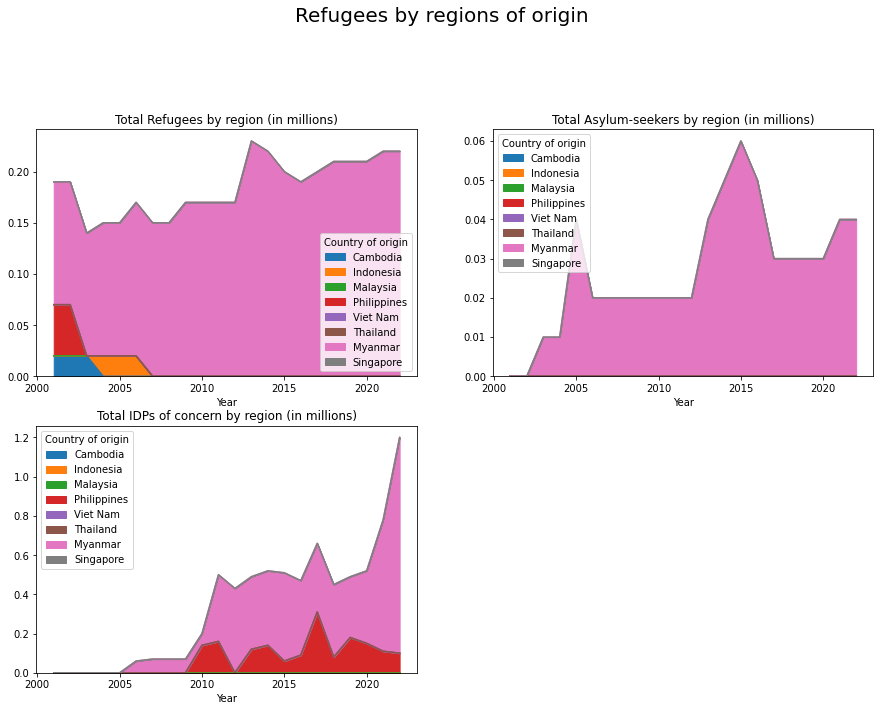

In [ ]:

asean_ref_pop_2 = asean_ref_pop.loc[asean_ref_pop["Year"] >= 2001]


fig = plt.figure(figsize=(15,10))

total_refugees_by_region_unstack = round(asean_ref_pop_2.groupby(["Year","Country of origin"])["Refugees under UNHCR's mandate"].sum()/1000000,2).unstack()
total_asylum_by_region_unstack = round(asean_ref_pop_2.groupby(["Year","Country of origin"])["Asylum-seekers"].sum()/1000000,2).unstack()
total_idp_by_region_unstack = round(asean_ref_pop_2.groupby(["Year","Country of origin"])["IDPs of concern to UNHCR"].sum()/1000000,2).unstack()

ax1 = plt.subplot(221)
total_refugees_by_region_unstack.plot(kind="area", y=["Cambodia", "Indonesia", "Malaysia", "Philippines", "Viet Nam",
       "Thailand", "Myanmar", "Singapore"], title="Total Refugees by region (in millions)", stacked=True, ax=ax1)
ax2 = plt.subplot(222)
total_asylum_by_region_unstack.plot(kind="area", y=["Cambodia", "Indonesia", "Malaysia", "Philippines", "Viet Nam",
       "Thailand", "Myanmar", "Singapore"], title="Total Asylum-seekers by region (in millions)", stacked=True, ax=ax2)
ax3 = plt.subplot(223)
total_idp_by_region_unstack.plot(kind="area", y=["Cambodia", "Indonesia", "Malaysia", "Philippines", "Viet Nam",
       "Thailand", "Myanmar", "Singapore"], title="Total IDPs of concern by region (in millions)", stacked=True, ax=ax3)


fig.suptitle("Refugees by regions of origin", y=1.05, fontsize='20')
plt.show()

Refugees in the graph being presented are from the Asian region. A potential region is that these region are impacted by wars and there is urgent need to leave the country immediately. There is no time to wait for asylum application to be approved.

For Asylum seekers, there are mostly coming from Myanmar. Europe is not on the list as the people are free to move about within the European region. There is also no conflict at all within this region. 

For IDP, the same three regions dominated the list. 

###4.4.2 Asean of Asylum By Region | 2001-2021

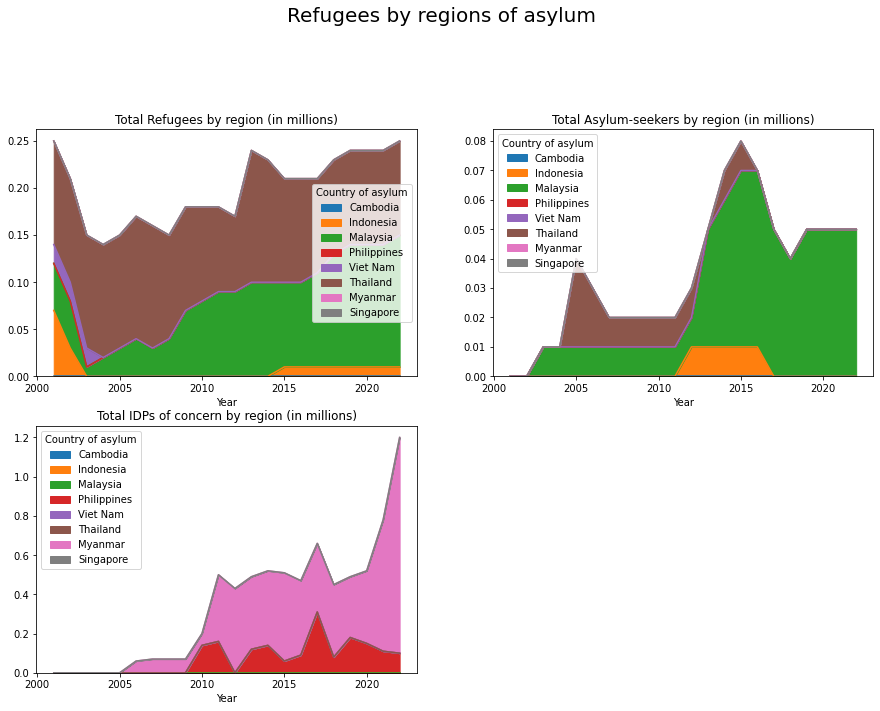

In [ ]:
asean_ref_pop_2 = asean_ref_pop.loc[asean_ref_pop["Year"] >= 2001]

fig = plt.figure(figsize=(15, 10))

total_refugees_by_region_unstack = round(asean_ref_pop_2.groupby(["Year","Country of asylum"])["Refugees under UNHCR's mandate"].sum()/1000000,2).unstack()
total_asylum_by_region_unstack = round(asean_ref_pop_2.groupby(["Year","Country of asylum"])["Asylum-seekers"].sum()/1000000,2).unstack()
total_idp_by_region_unstack = round(asean_ref_pop_2.groupby(["Year","Country of asylum"])["IDPs of concern to UNHCR"].sum()/1000000,2).unstack()

ax1 = plt.subplot(221)
total_refugees_by_region_unstack.plot(kind="area", y=["Cambodia", "Indonesia", "Malaysia", "Philippines", "Viet Nam",
       "Thailand", "Myanmar", "Singapore"], title="Total Refugees by region (in millions)", stacked=True, ax=ax1)

ax2 = plt.subplot(222)
total_asylum_by_region_unstack.plot(kind="area", y=["Cambodia", "Indonesia", "Malaysia", "Philippines", "Viet Nam",
       "Thailand", "Myanmar", "Singapore"], title="Total Asylum-seekers by region (in millions)", stacked=True, ax=ax2)

ax3 = plt.subplot(223)
total_idp_by_region_unstack.plot(kind="area", y=["Cambodia", "Indonesia", "Malaysia", "Philippines", "Viet Nam",
       "Thailand", "Myanmar", "Singapore"], title="Total IDPs of concern by region (in millions)", stacked=True, ax=ax3)


fig.suptitle("Refugees by regions of asylum", y=1.05, fontsize='20')
plt.show()

Similar to region of origin, most refugee will fled to the nearby countries in Asia and Africa. Thailand hosts the largest number of refugees as a country of asylum since 21st century.
For Asylum seekers, there is quite a balance in the receiving region. Thailand dominate the list as Thailand is accepting the most asylum seekers in the Asia.

For stateless person, there are mostly accepeted in the Asia region.

## 4.5 Trend of Asean Gender Ratio | 2001-2021 

In [ ]:
asyl_ref_demo.head(5)

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Female 0 - 4,Female 5 - 11,Female 12 - 17,Female 18 - 59,Female 60,Female other,Female total,Male 0 - 4,Male 5 - 11,Male 12 - 17,Male 18 - 59,Male 60,Male other,Male total,Total
550,2001,Afghanistan,AFG,Cambodia,KHM,0,0,0,5,0,0,5,0,5,0,7,0,0,12,17
551,2001,China,CHN,Cambodia,KHM,0,0,0,5,0,0,5,0,0,0,5,0,0,5,10
552,2001,Iran (Islamic Rep. of),IRN,Cambodia,KHM,0,0,5,0,0,0,5,0,0,0,0,0,0,0,5
553,2001,Iraq,IRQ,Cambodia,KHM,0,0,0,0,0,0,0,0,5,0,0,0,0,5,5
554,2001,Sri Lanka,LKA,Cambodia,KHM,0,0,0,11,0,0,11,0,0,0,0,0,0,0,11


In [ ]:
asyl_ref_demo["Country of asylum"].unique()

array(['Cambodia', 'Indonesia', 'Malaysia', 'Philippines', 'Viet Nam',
       'Thailand', 'Myanmar', 'Singapore'], dtype=object)

In [ ]:
asyl_ref_demo["gender_ratio"] = (asyl_ref_demo["Male total"] / asyl_ref_demo["Female total"]) * 100
asyl_ref_demo["gender_ratio"][(asyl_ref_demo["gender_ratio"] == inf) | (asyl_ref_demo["gender_ratio"].isnull())] = 0
asyl_ref_demo.sample(5)

<ipython-input-42-f0bd47ed3d6c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asyl_ref_demo["gender_ratio"][(asyl_ref_demo["gender_ratio"] == inf) | (asyl_ref_demo["gender_ratio"].isnull())] = 0


,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Female 0 - 4,Female 5 - 11,Female 12 - 17,Female 18 - 59,Female 60,...,Female total,Male 0 - 4,Male 5 - 11,Male 12 - 17,Male 18 - 59,Male 60,Male other,Male total,Total,gender_ratio
61789,2016,Egypt,EGY,Indonesia,IDN,6,5,8,0,0,...,19,0,0,0,11,0,0,11,30,57.894737
28560,2008,Lao People's Dem. Rep.,LAO,Thailand,THA,27,59,43,94,5,...,228,39,61,41,136,7,0,284,512,124.561404
27891,2008,Palestinian,PSE,Philippines,PHL,0,0,0,0,0,...,0,0,0,0,27,0,0,27,27,0.000000
8350,2003,Iran (Islamic Rep. of),IRN,Indonesia,IDN,0,0,0,0,0,...,0,0,0,0,6,0,0,6,6,0.000000
52199,2014,Kuwait,KWT,Indonesia,IDN,0,8,0,0,0,...,8,0,0,0,7,0,0,7,15,87.500000


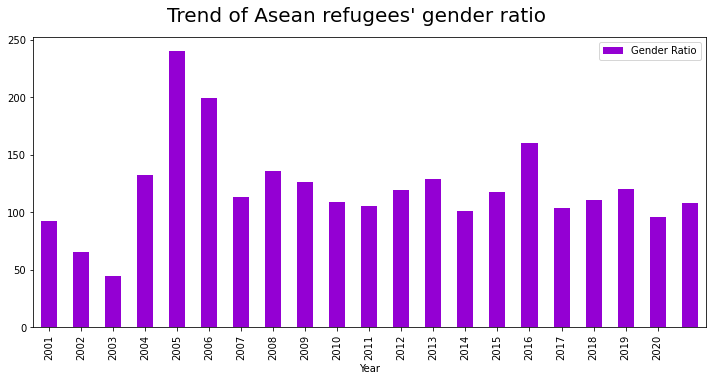

In [ ]:
avg_yrly_accept_gender1 = asyl_ref_demo.groupby(["Year"])[["gender_ratio"]].mean().reset_index()

plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

labels = np.arange(2001,2021)
default_x_ticks = range(len(labels))

fig, ax = plt.subplots()

avg_yrly_accept_gender1['gender_ratio'].plot(kind='bar', color='darkviolet', label="Gender Ratio")

fig.suptitle("Trend of Asean refugees' gender ratio",y=1.05, fontsize='20')
plt.xlabel("Year")
plt.xticks(default_x_ticks, labels)
plt.legend()
plt.show()

Based on the graph plotted, The gender ratio seems to be changing all the time. But since 2007, the ratio tends to be stable. We shall investigate further to confirm the relationship.

## 4.6 Asean Refugees population growth (by gender and age) | 2001-2021

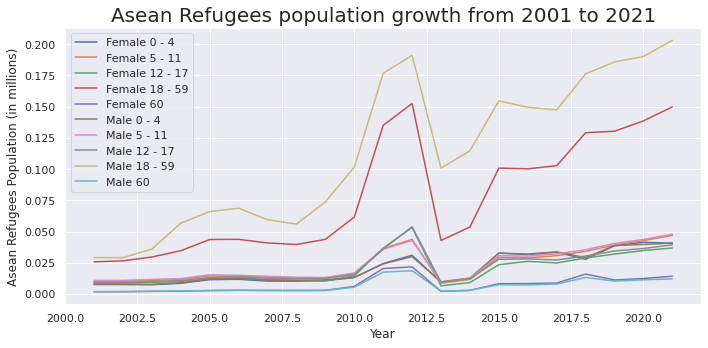

In [ ]:
sum_gender = asyl_ref_demo.groupby(["Year"])[["Female 0 - 4", "Female 5 - 11", "Female 12 - 17", "Female 18 - 59", "Female 60", "Male 0 - 4", "Male 5 - 11", "Male 12 - 17", "Male 18 - 59", "Male 60"]].sum()/1000000
df_demo_gender = pd.DataFrame(sum_gender).reset_index()

sns.set(rc = {'figure.figsize':(10,5)})

plt.plot(df_demo_gender.Year, df_demo_gender["Female 0 - 4"], label="Female 0 - 4")
plt.plot(df_demo_gender.Year, df_demo_gender["Female 5 - 11"], label="Female 5 - 11")
plt.plot(df_demo_gender.Year, df_demo_gender["Female 12 - 17"], label="Female 12 - 17")
plt.plot(df_demo_gender.Year, df_demo_gender["Female 18 - 59"], label="Female 18 - 59")
plt.plot(df_demo_gender.Year, df_demo_gender["Female 60"], label="Female 60")
plt.plot(df_demo_gender.Year, df_demo_gender["Male 0 - 4"], label="Male 0 - 4")
plt.plot(df_demo_gender.Year, df_demo_gender["Male 5 - 11"], label="Male 5 - 11")
plt.plot(df_demo_gender.Year, df_demo_gender["Male 12 - 17"], label="Male 12 - 17")
plt.plot(df_demo_gender.Year, df_demo_gender["Male 18 - 59"], label="Male 18 - 59")
plt.plot(df_demo_gender.Year, df_demo_gender["Male 60"], label="Male 60")

plt.legend(loc="best")
plt.xlabel("Year")
plt.ylabel("Asean Refugees Population (in millions)")
plt.title("Asean Refugees population growth from 2001 to 2021", fontsize='20')
plt.show()

All the age group exihibit similar trends regardless of gender. From the line chart, we can see that majority of the refugee population coming from the 18 to 59 age group. The big gap with the other age group is of course due to there is generally more population in the 18 to 59 age group. When combining the age group of 0 to 17, the figure is just slightly less than 18 to 59 group.

The above 60 years old remians as the minority. Due to poor living condition, the average age of refugee generally do not exceed 60 years old. On top of that, aged population are having great difficulties in fleeding their country. The journey are long, dangerous and tiring. Most aged people will not be able to handle such situation.

Young age group is considered as the hope of the family and they generally will be given the priority to fled the country if there is any opportunity.




##  4.7 Asean Refugee Age Group Percentage

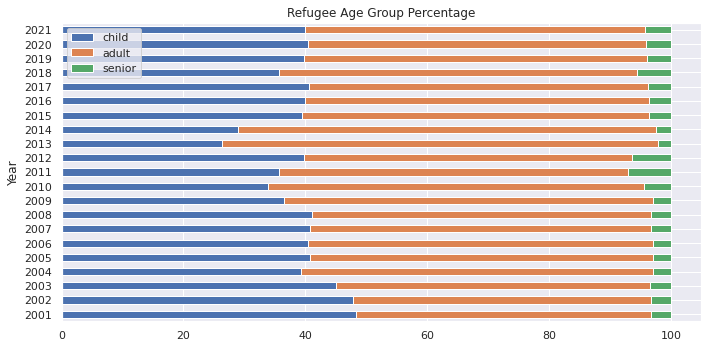

In [ ]:
df_demo_eda = asyl_ref_demo
df_demo_eda['childTotal'] = asyl_ref_demo[['Female 0 - 4', 'Female 5 - 11', 'Female 12 - 17', 'Male 0 - 4', 'Male 5 - 11', 'Male 12 - 17' ]].sum(axis=1)
df_demo_eda['adultTotal'] = asyl_ref_demo[['Female 18 - 59', 'Male 18 - 59']].sum(axis=1)
df_demo_eda['seniorTotal'] = asyl_ref_demo[['Female 60', 'Male 60']].sum(axis=1)
df_demo_byYear = df_demo_eda.groupby('Year').sum()
df_demo_byYear['child'] = (df_demo_byYear['childTotal']/(df_demo_byYear['childTotal'] + df_demo_byYear['adultTotal'] + df_demo_byYear['seniorTotal'])) * 100
df_demo_byYear['adult'] = (df_demo_byYear['adultTotal']/(df_demo_byYear['childTotal'] + df_demo_byYear['adultTotal'] + df_demo_byYear['seniorTotal'])) * 100 
df_demo_byYear['senior'] = (df_demo_byYear['seniorTotal']/(df_demo_byYear['childTotal'] + df_demo_byYear['adultTotal'] + df_demo_byYear['seniorTotal'])) * 100
df_demo_byYear[['child','adult','senior']].plot(kind='barh', stacked=True, title='Refugee Age Group Percentage')
#df_demo_byYear

The above chart shows the age composition of refugees in different periods. From 2001 to 2021, the proportion of adults is relatively the highest, followed by children. Senior people account for the least. In 2013, the percentage of adults reached its highest. This is because children and adults have more energy to escape and seek asylum in other countries.


##4.8 Test Statistics for Gender in Asean Total Refugees

Test statistics for gender to identify the significant different in mean.

*   Alternative Hypothesis: The mean of female refugees is greater than male refugees
Null 
*   Hypothesis: The mean of female refugees is less than male refugees





In [ ]:
import pandas as pd
from scipy.stats import ttest_rel

a1 = asyl_ref_demo['Female total']
b1 = asyl_ref_demo['Male total']
t, p = ttest_rel(a1,b1)
print ('t-statistics:',t)
print ('p-value:',p)
print()

if p < 0.05:
    print('We are rejecting the null hypothesis')
    print('Conclusion: The mean of female refugees is greater than male refugees')
else:
    print('We are accepting the null hypothesis')
    print('Conclusion: The mean of female refugees is less than male refugees' )

NameError: ignored

# **5.0 Modeling**


For our modeling we intend to use:


*   **Linear Regression** - Global Displacement Trends in 2025
     
     Objective: To predict the number of refugees in total population size for ASEAN countries in 2025 to better prepare for necessary services to support them.

*   **Linear Regression** - Prediction of refugees population growth

*   **ARIMA Model** - Prediction of refugees population growth (approach to time series forecasting)














## 5.1 Linear Regression - Global Displacement Trends in 2025
     
   

In [ ]:
asean_ref_pop.sample(5)

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Refugees under UNHCR's mandate,Asylum-seekers,IDPs of concern to UNHCR
1649,1999,Sri Lanka,LKA,Philippines,PHL,28,0,0
67194,2016,Iraq,IRQ,Indonesia,IDN,374,572,0
20874,2005,Liberia,LBR,Indonesia,IDN,0,5,0
7714,2001,Palestinian,PSE,Philippines,PHL,12,7,0
18756,2004,Palestinian,PSE,Thailand,THA,12,8,0


In [ ]:
asyl_ref_demo.sample(5)

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Female 0 - 4,Female 5 - 11,Female 12 - 17,Female 18 - 59,Female 60,...,Male 12 - 17,Male 18 - 59,Male 60,Male other,Male total,Total,gender_ratio,childTotal,adultTotal,seniorTotal
57002,2015,Kuwait,KWT,Indonesia,IDN,0,5,9,0,0,...,0,11,0,0,11,25,78.571429,14,11,0
26879,2008,Sri Lanka,LKA,Indonesia,IDN,0,0,0,5,0,...,0,110,0,0,110,115,2200.000000,0,115,0
12765,2004,Sudan,SDN,Philippines,PHL,0,0,0,0,0,...,0,5,0,0,5,5,0.000000,0,5,0
83967,2020,Afghanistan,AFG,Philippines,PHL,0,0,0,0,0,...,0,9,0,0,9,9,0.000000,0,9,0
79510,2019,Myanmar,MMR,Thailand,THA,3963,7775,6751,25557,3084,...,6884,24077,2919,0,46218,93348,98.064927,37711,49634,6003


In [ ]:
def specify_country(dataframe_input, country):
    '''This is utilized to filter a dataset across all countries to one specific one.
    '''
    dataframe_output = dataframe_input[dataframe_input['Country of asylum'] == country]
    return dataframe_output

def lin_reg(dataframe_input, total, test_size):
    '''This builds the linear regression model for a specific dataset. 
    First it converts x and y data to numpy arrays and then creates a linear regression model.
    Methodology based on [5].
    '''
    x_data = asyl_ref_demo['Year']
    y_data = asyl_ref_demo['Total']

    # create training and testing datasets, pick a small test_size as there isn't a lot of data
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = test_size)

   

In [ ]:
 # create linear regression object
    lr = linear_model.LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)

    linear_regression_list = [lr.coef_[0][0], lr.intercept_[0], test_size, r2_score(y_test, y_pred)]

    return linear_regression_list

def get_max_r_squared(dataframe_input, total, country):
    '''This is used to iterate over different test_sizes for train/test/split such that we can get a max R squared value.
    '''
    cols_max_r2 = ['coefficient', 'intercept', 'test_size', 'r_squared']
    appended_data = []
    test_size_range = np.linspace(0.01, 0.3, 100, endpoint = False) 

    for i in test_size_range:
        appended_data.append(lin_reg(dataframe_input = dataframe_input, total = total, test_size = i))

    r2_df = pd.DataFrame(appended_data, columns = cols_max_r2)

    max_r2 = r2_df[r2_df['r_squared'] == r2_df['r_squared'].max()].reset_index(drop = True).iloc[:1]
    max_r2['total'] = total
    max_r2['country'] = country
    max_r2 = max_r2[['country', 'total', 'coefficient', 'intercept', 'test_size', 'r_squared']]
    return max_r2

In [ ]:
asyl_ref_demo.sample(5)

,Year,Country of origin,Country of origin (ISO),Country of asylum,Country of asylum (ISO),Female 0 - 4,Female 5 - 11,Female 12 - 17,Female 18 - 59,Female 60,...,Male 12 - 17,Male 18 - 59,Male 60,Male other,Male total,Total,gender_ratio,childTotal,adultTotal,seniorTotal
23478,2007,Burundi,BDI,Malaysia,MYS,0,0,0,0,0,...,0,0,0,0,0,5,0.000000,0,0,0
39614,2011,Viet Nam,VNM,Malaysia,MYS,0,0,0,0,0,...,0,5,0,0,10,10,0.000000,5,5,0
49583,2013,Somalia,SOM,Thailand,THA,14,0,8,49,0,...,15,65,0,0,86,157,121.126761,43,114,0
87862,2021,Sri Lanka,LKA,Indonesia,IDN,21,29,34,106,5,...,23,169,0,0,243,438,124.615385,158,275,5
19639,2006,Myanmar,MMR,Malaysia,MYS,1059,794,1247,4748,107,...,1541,16533,187,0,20343,28298,255.725959,6723,21281,294


In [ ]:
# list of countries
full_country_list = asyl_ref_demo['Country of asylum'].sort_values().unique()
total_list = pd.DataFrame({'Total': ['Total']})
cols_final_df = ['country', 'Total', 'coefficient', 'intercept', 'test_size', 'r_squared']
lin_reg_list =[]

# iterate over each country and total in dataframes
for country in full_country_list:
    for n in total_list['Total']:
        country_specified_dataframe = specify_country(asyl_ref_demo, country)
        lin_reg_object = get_max_r_squared(country_specified_dataframe, n, country)
        lin_reg_list.append(lin_reg_object)

overall_table_regression = pd.concat(lin_reg_list, ignore_index = True)
overall_table_regression['total'] = pd.Categorical(overall_table_regression['total'], categories = ['Total'])
overall_table_regression = overall_table_regression.sort_values(by = ['country', 'total']).reset_index(drop = True)

In [ ]:
full_country_list

array(['Cambodia', 'Indonesia', 'Malaysia', 'Myanmar', 'Philippines',
       'Singapore', 'Thailand', 'Viet Nam'], dtype=object)

In [ ]:
overall_table_regression.sample(5)

,country,total,coefficient,intercept,test_size,r_squared
1,Indonesia,Total,-50.395142,102013.305898,0.1521,0.031277
5,Singapore,Total,-0.143223,293.572890,0.1956,0.239971
2,Malaysia,Total,108.656724,-215789.443296,0.0709,0.010170
6,Thailand,Total,-116.807898,239624.553651,0.0477,0.018834
0,Cambodia,Total,-4.348240,8782.225722,0.1695,0.140742


Simple Linear Regression was utilized across ASEAN countries and total refugee population, R-squared was maximized to get the best fit.

Including country and total refugee population, linear regression object values and geographic locations.

In [ ]:
def do_geocode(address):
    '''Recursive function to pull location data associated with address input
    '''
    # set geolocator object
    geolocator = Nominatim(user_agent = 'GeoNames')

    try:
        location = geolocator.geocode(address)
        return np.array([address, location.latitude, location.longitude])
    except GeocoderTimedOut:
        return do_geocode(address)

def generate_map(dataframe, total, year):
    '''This plots a logarithmically scaled colorscale of the number of displaced people from each country 
    in the dataframe, with a scale of blue (few displaced individuals) to red (many displaced individuals). 
    This does not plot points at all for countries that are predicting a negative number of displaced
    individuals.
    '''
    map_df = dataframe[dataframe['total'] == total]
    displacement_map = folium.Map([1.352083,103.819836], 
                                  zoom_start = 4.1,
                                  tiles = 'CartoDB dark_matter')
    for index, row in map_df.iterrows():
        prediction = (row['coefficient'] * year) + row['intercept']
        popup_text = '{}, {}: {}'.format(row['country'], year, str(int(round((row['coefficient'] * year) + row['intercept']))))
        # logarithmic scale of color markers
        if 0 <= prediction < 1000:
            folium.CircleMarker(location = (row['latitude'], row['longitude']), color = 'lightgreen', popup = folium.Popup(popup_text, parse_html = True), fill = True, fill_opacity = 0.7, radius = 3.66).add_to(displacement_map) 
        elif 1000 <= prediction < 10000:
            folium.CircleMarker(location = (row['latitude'], row['longitude']), color = 'lightblue', popup = folium.Popup(popup_text, parse_html = True), fill = True, fill_opacity = 0.7, radius = 4).add_to(displacement_map) 
        elif 10000 <= prediction < 100000:
            folium.CircleMarker(location = (row['latitude'], row['longitude']), color = 'yellow', popup = folium.Popup(popup_text, parse_html = True), fill = True, fill_opacity = 0.7, radius = 4.33).add_to(displacement_map) 
        elif 100000 <= prediction < 1000000:
            folium.CircleMarker(location = (row['latitude'], row['longitude']), color = 'orange', popup = folium.Popup(popup_text, parse_html = True), fill = True, fill_opacity = 0.7, radius = 4.66).add_to(displacement_map)
        elif 1000000 <= prediction < 10000000:
            folium.CircleMarker(location = (row['latitude'], row['longitude']), color = 'red', popup = folium.Popup(popup_text, parse_html = True), fill = True, fill_opacity = 0.7, radius = 5).add_to(displacement_map) 
    return displacement_map

In [ ]:
geocode_df = pd.read_csv("https://raw.githubusercontent.com/oughton/geocode/master/example/result.csv", header = None)
geocode_df.rename(columns=({0: 'country', 1: 'latitude', 2: 'longitude'}), inplace=True)

overall_table_regression_1 = overall_table_regression.merge(geocode_df, how = 'left', on = 'country')
overall_table_regression_1.dropna(subset = ["latitude", "longitude"], inplace=True)
generate_map(overall_table_regression_1, 'Total', 2025)

Objective: To predict the number of refugees in total population of ASEAN country size to better prepare for necessary services to support them. 

Observation: In 2025, total refugee population of ASEAN country trends vary widely between countries. Refugees primarily being displaced in parts of: 
Malaysia, Thailand, Philipines and Singapore. 


* Malaysia -  Estimated 4240 refugees in Malaysia in 2025. 
* Thailand - Estimated 3089 refugees in Thailand in 2025.
* Philipines - Estimated 5547 refugees in Philipines in 2025.
* Singapore - Estimated 4 refugees in Singapore in 2025.

Philipines highest, while Singapore has the lowest number. 

## 5.2 Linear Regression - Prediction of refugees population growth

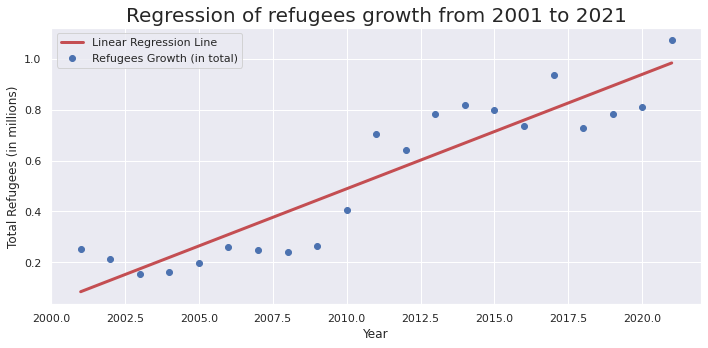



The predicted refugees in 2025 will be 1.16 millions
The predicted refugees in 2030 will be 1.39 millions
The predicted refugees in 2050 will be 2.29 millions


In [ ]:
sum_total = asyl_ref_demo.groupby(["Year"])[["Total"]].sum()/1000000
df_demo_total = pd.DataFrame(sum_total).reset_index()
sns.set(rc = {'figure.figsize':(10,5)})

# set up regression line
slope, intercept, r_value, p_value, std_err = linregress(df_demo_total.Year,df_demo_total.Total)
line = [slope*xi + intercept for xi in df_demo_total.Year]

# plot the regression line and the linear fit
plt.plot(df_demo_total.Year, line,'r-', linewidth=3, label='Linear Regression Line')
plt.scatter(df_demo_total.Year, df_demo_total.Total, label='Refugees Growth (in total)')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Total Refugees (in millions)')
plt.title('Regression of refugees growth from 2001 to 2021', fontsize='20')
plt.show()

print("\n")
# use the linear fit to predict the refugees in 2025, 2030 and 2050
# using equation y=mx + c, i.e. refugees=slope*year+intercept
print("The predicted refugees in 2025 will be {:.2f} millions".format((slope*2025)+intercept))
print("The predicted refugees in 2030 will be {:.2f} millions".format((slope*2030)+intercept))
print("The predicted refugees in 2050 will be {:.2f} millions".format((slope*2050)+intercept))


The predicted refugees in 2025 will be 1.16 millions
The predicted refugees in 2030 will be 1.39 millions
The predicted refugees in 2050 will be 2.29 millions

## 5.3 Prediction of refugees population growth (ARIMA Model)


         Total
Year          
2001  0.253286
2002  0.211034
2003  0.154229
2004  0.160802
2005  0.196488
2006  0.259592
2007  0.249295
2008  0.242225
2009  0.264406
2010  0.406526
2011  0.704325
2012  0.640567
2013  0.781650
2014  0.819230
2015  0.799371
2016  0.737630
2017  0.937673
2018  0.729082
2019  0.783685
2020  0.812272
2021  1.073391
From the trendline, it's clearly not stationary


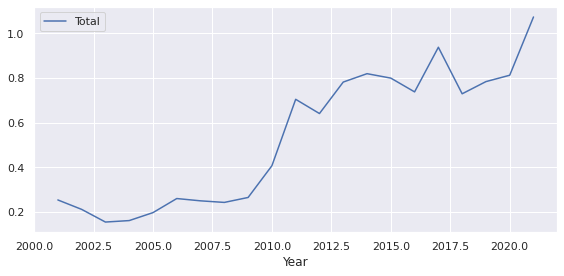

In [ ]:
arimaData = df_demo_total[['Year', 'Total']]
arimaData.set_index('Year', inplace=True)
print(arimaData)
arimaData.plot(figsize=(8, 4))
print("From the trendline, it's clearly not stationary")

Text(0.5, 1.0, 'Autocorrelation and Partial Autocorrelation')

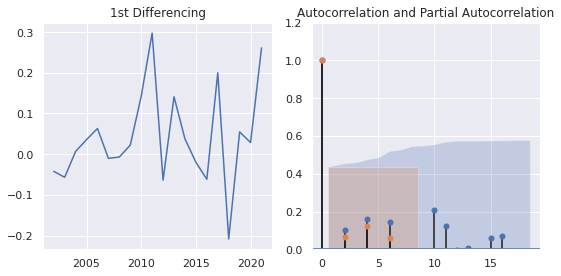

In [ ]:
# Transform Non-Stationary to Stationary using Differencing
# d=1: y(t) = Y(t) - Y(t-1)

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
arimaData['1diff'] = arimaData['Total'] - arimaData['Total'].shift(1)
ax[0].plot(arimaData['1diff']); ax[0].set_title('1st Differencing')
ax[1].set(ylim=(0,1.2))
plot_acf(arimaData['1diff'].dropna(), lags=18, ax=ax[1]);
plot_pacf(arimaData['1diff'].dropna(), lags=8, ax=ax[1]);
ax[1].set_title('Autocorrelation and Partial Autocorrelation')

# Since both ACF and PACF Lag value cutt off at Lag-1, we suggest that p = 1, q = 1

In [ ]:
result = adfuller(arimaData['1diff'].dropna())
labels = ['ADF Test Statistic','p-value','Lags Used','Number of Observations']
for value,label in zip(result,labels):
  print(label+' : {:.2f}'.format(value))

# H0 of the ADF test is that the time series is non-stationary
print("p-value < 0.05, Reject Null Hypothesis (Means Is Stationary), d = 1")

ADF Test Statistic : -3.48
p-value : 0.01
Lags Used : 8.00
Number of Observations : 11.00
p-value < 0.05, Reject Null Hypothesis (Means Is Stationary), d = 1


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


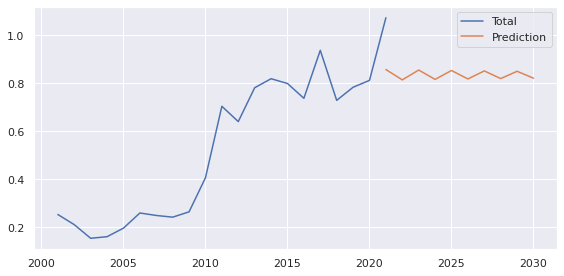

In [ ]:
import statsmodels.api as sm
arimaModel=sm.tsa.statespace.SARIMAX(arimaData['Total'],order=(1,1,1))
arimaFit = arimaModel.fit()
# arimaFit.summary()
arimaNew = pd.DataFrame(index=[x for x in range(20,30)], columns=arimaData.columns)
arimaPred = pd.concat([arimaData, arimaNew])
arimaPred['Prediction'] = arimaFit.predict(start=20, end=30, dynamic=True)
arimaPred.rename(index={20: 2021, 21: 2022, 22: 2023, 23: 2024, 24: 2025, 25: 2026, 26: 2027, 27: 2028, 28: 2029, 29: 2030, 30: 2031}, inplace=True)
arimaPred[['Total', 'Prediction']].plot(figsize=(8, 4))

#6.0 Evaluation

To evaluate ARIMA Model

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error

rmse = sqrt(mean_squared_error(arimaPred.Total[0:21], arimaFit.predict()))
print("The root mean square error (RMSE) is {:.2f}".format(rmse))

The root mean square error (RMSE) is 0.13


In the case of an RMSE of 0.13, this suggests that the predicted values are very close to the actual values, on average. A lower RMSE value indicates a better fit of the model to the data.

# 7.0 Deployment

The project is deployed fully using Jupyter notebook

# 8.0 Conclusion 


The team presents a research done on discovering the patterns and trends of global refugee movements and to potentially increase public’s awareness on this matter. As well as to understand and analyze the impact of demographic factors such as age band and gender. The multifaceted nature of civil wars and the lack of systematic reports make it challenging to predict global refugee movements. However, with the availability of UNHCR data, it is possible to construct and analyze, patterns and trends of global refugee movements. 






#7.0 Future Work 

Future study using other regression algorithms and a hybrid
model at different training and testing ratios for global displacement refugee is under consideration.Researchers could also investigate the effectiveness of different interventions and programs designed to support refugees, such as language classes, job training, and access to healthcare. Another important area of research is understanding the long-term impacts of displacement on refugees, including mental health and well-being, education, and economic integration. Overall, there is a wide range of opportunities for research on ASEAN refugees that can contribute to a more comprehensive understanding of the challenges they face and the ways in which they can be supported to rebuild their lives in their host countries.

# 8.0 Reference 

1. Data Retrived from - https://data.worldbank.org/indicator/SM.POP.REFG